In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [53]:
directory = '/Users/joelt/datahere/filedump/'

dfs_dict = {}

# Loop through all years from 2002 to 2023
for year in range(2002, 2024):
    # Get a list of all Excel files in the directory for the given year
    files = [f for f in os.listdir(directory) if f.endswith('.xlsx') and f.split('_')[2][:4] == str(year)]

    # Initialize a list to store DataFrames for the current year
    dfs = []

    # Loop through the files and read each into a dataframe
    for file in files:
        df = pd.read_excel(os.path.join(directory, file))  # Include the full path to the file
        dfs.append(df)

    # Concatenate all dataframes in the list
    all_data = pd.concat(dfs, ignore_index=True)

    # Rename the '# Det' column to '# Det {year}'
    # all_data = all_data.rename(columns={'# Det': f'# Det {year}'})

    # Group by 'Freeway' and calculate the mean of '# Det {year}'
    final_data = all_data.groupby(['Freeway']).agg({'# Det': 'mean', '% Good': 'mean'}).reset_index()


    # Store the DataFrame in the dictionary
    dfs_dict[year] = final_data

    print(f"Data for {year} successfully stored in the dictionary.")


Data for 2002 successfully stored in the dictionary.
Data for 2003 successfully stored in the dictionary.
Data for 2004 successfully stored in the dictionary.
Data for 2005 successfully stored in the dictionary.
Data for 2006 successfully stored in the dictionary.
Data for 2007 successfully stored in the dictionary.
Data for 2008 successfully stored in the dictionary.
Data for 2009 successfully stored in the dictionary.
Data for 2010 successfully stored in the dictionary.
Data for 2011 successfully stored in the dictionary.
Data for 2012 successfully stored in the dictionary.
Data for 2013 successfully stored in the dictionary.
Data for 2014 successfully stored in the dictionary.
Data for 2015 successfully stored in the dictionary.
Data for 2016 successfully stored in the dictionary.
Data for 2017 successfully stored in the dictionary.
Data for 2018 successfully stored in the dictionary.
Data for 2019 successfully stored in the dictionary.
Data for 2020 successfully stored in the dicti

In [48]:
dfs_dict[2002]

,Freeway,# Det,% Good
0,I405-N,363.0,54.923582
1,I405-S,368.0,53.584723
2,I5-N,629.0,65.738615
3,I5-S,660.0,67.410129
4,I605-N,9.0,85.570776
5,I605-S,12.0,73.744292
6,SR133-N,45.0,55.799087
7,SR133-S,40.0,55.767123
8,SR22-E,111.0,61.266198
9,SR22-W,122.0,66.330564


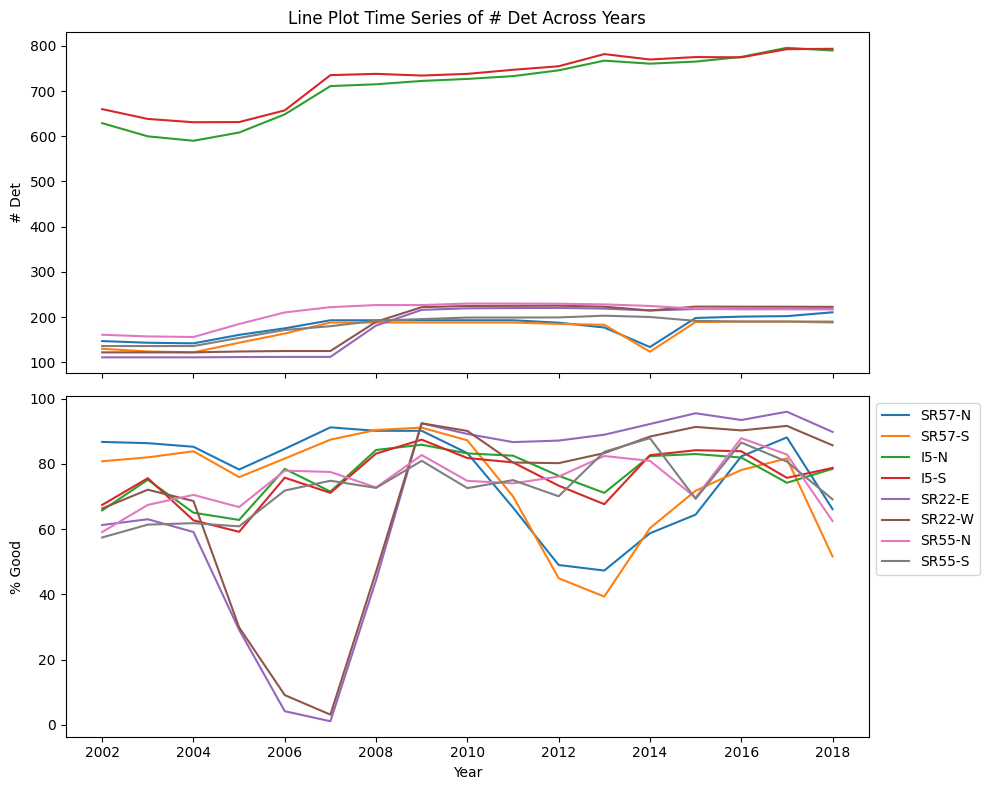

In [52]:
freeways_of_interest = ['SR57-N', 'SR57-S', 'I5-N', 'I5-S', 'SR22-E', 'SR22-W', 'SR55-N', 'SR55-S']

# Initialize a figure and axis for the plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Iterate over the list of freeways
for freeway_of_interest in freeways_of_interest:
    dfs_list_det = []
    dfs_list_good = []

    # Iterate through the years and accumulate values for the specified freeway
    for year, df in dfs_dict.items():
        if freeway_of_interest in df['Freeway'].values:
            det_values = df[(df['Freeway'] == freeway_of_interest)]['# Det']
            good_values = df[(df['Freeway'] == freeway_of_interest)]['% Good']

            year_df_det = pd.DataFrame({'Year': [year] * len(det_values), '# Det': det_values})
            year_df_good = pd.DataFrame({'Year': [year] * len(good_values), '% Good': good_values})

            dfs_list_det.append(year_df_det)
            dfs_list_good.append(year_df_good)

    # Concatenate all DataFrames for the current freeway
    line_plot_data_det = pd.concat(dfs_list_det, ignore_index=True)
    line_plot_data_good = pd.concat(dfs_list_good, ignore_index=True)

    # Plot the line graphs for # Det on the first y-axis
    ax1.plot(line_plot_data_det['Year'], line_plot_data_det['# Det'], linestyle='-', label=f'{freeway_of_interest}')

    # Plot the line graphs for % Good on the second y-axis
    ax2.plot(line_plot_data_good['Year'], line_plot_data_good['% Good'], linestyle='-', label=f'{freeway_of_interest}')

# Set labels and title
ax1.set_ylabel('# Det')
ax2.set_xlabel('Year')
ax2.set_ylabel('% Good')
ax1.set_title(f'Line Plot Time Series of # Det Across Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()